In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Link to the notebook
https://github.com/edgeslab/cs418-project-team-asia/blob/master/Chicago%20Crime%20Analysis/Progress%20Report.ipynb

### Introduction

Project is about the crime analysis in Chicago area. Based on the different house prices of different neighborhoods and the crime occurrence in those areas, our goal is to show that that there is co-relation between the crime rates and house prices. So far we analyzed chicago crime data and median sale price of neighborhood in Chicago. House prices in neighborhoods of Chicago give us an idea about the economic condition of that neighborhood. Now, we are investigating to find out if there is any relation between average income and crime rate.


### Any Changes

First of all we collected chicago crime data. Then we tried to collect average income based upon chicago neighborhoods from 2012-2018; which we failed to collect. After that we discussed to collect house price of chicago neighborhood. We collected data from Redfin. Currently we are facing one problem which is to calculate crime rate. We need population of chicago neighborhood to calculate crime rate.

### Data Cleaning

After getting the house price data, we removed those column where there was no value available. We also planned to work with price per square feet value. So we keep Price per square and sale price and filtered out the rest.  
Since we have house price of chicago neighborhood from 2012-2018, we get rid of all the crimes which occurred before 2012.

### Exploratory data analysis:

In our project we are using two datasets: Chicago Crime Data and House Prices Data.

**Chicago Crime Data**:
This dataset contains the criminal offences occurred in Chicago from 2001-2019. However, we are going to use crime data in 2012-2019. Each record in this dataset represents the details of a crime that happened in Chicago. The details include the time, type, description, location etc. of the crime. However, we are only going to use time and location of every crime. In this dataset, the neighborhood or the zipcode of the location of the crime is not given. Since, our goal is to analyze the crime happening in Chicago based on different areas and their relationship with the economy of those areas, we had to extract the neighborhoods from the location given in coordinates. We used the **ArcGIS** API to extract the neighborhoods. However, it is taking a huge amount of time to extract the neighborhoods with ArcGIS API. Although our whole dataset contains more than 2 million records, we are currently experimenting with half a million. We will use the whole dataset before our final submission. The function used for extracting the neighborhood data is given below.

**House Prices Data from Redfin**:
Redfin provides the data of home sale prices from 2012-2019. Each record represents a 90-day period. Each row includes median sale price, median price per square foot, median listed price, number of houses sold within that 90-day period in a particular neighborhood.
We are going to relate our 2 datasets using their neighborhood.

Some of the rows from out data sets are shown below:

In [2]:
df1 = pd.read_csv("databyneighborhood.csv")
df1.head()

,Region,Period Begin,Median Ppsf,Median Sale Price
0,"Chicago, IL - Albany Park",11/1/2011,78.400000,$154K
1,"Chicago, IL - Albany Park",12/1/2011,76.800000,$122K
2,"Chicago, IL - Albany Park",1/1/2012,77.929915,$129K
3,"Chicago, IL - Albany Park",2/1/2012,80.898704,$131K
4,"Chicago, IL - Albany Park",3/1/2012,98.397311,$141K


In [3]:
df1.tail()

,Region,Period Begin,Median Ppsf,Median Sale Price
15389,"Chicago, IL - Wrightwood",10/1/2018,115.823817,$183K
15390,"Chicago, IL - Wrightwood",11/1/2018,339.663980,$632K
15391,"Chicago, IL - Wrightwood",11/1/2018,124.815317,$169K
15392,"Chicago, IL - Wrightwood",12/1/2018,127.524222,$168K
15393,"Chicago, IL - Wrightwood",12/1/2018,338.888889,$638K


In [ ]:
# from arcgis.gis import GIS
# from arcgis.geocoding import reverse_geocode
# from arcgis.geometry import Geometry
# import math

# def FindAdress(row):
#     if (math.isnan(row['X Coordinate'])) or (math.isnan(row['Y Coordinate'])):
#         return None,None,None
#     else: 
#         pt = Geometry({"x": row['X Coordinate'],"y": row['Y Coordinate'],"spatialReference": {"wkid": 3435}})
#         result = reverse_geocode(pt)
        
#         return pd.Series({
#             'Neighborhood': result['address']['Neighborhood'],
#             'Zipcode': result['address']['Postal'],
#             'Address': result})


# file = 'crimes.csv'

# data = pd.read_csv(file)

# testData = data[200000:300000]#lower and upper bound of rows your are converting

# gis = GIS("https://univofillinois.maps.arcgis.com/home/index.html", "id", "password")

# newcolumns = testData.apply(FindAdress,axis=1)

# testData['Neighborhood'] = newcolumns['Neighborhood']
# testData['Zipcode'] = newcolumns['Zipcode']
# testData['Address'] = newcolumns['Address']

# print(testData.shape)

# testData.to_csv('200000To300000.csv')#add name of outputfile. Nameformat: LowerBoundToUpperbound.csv. For example: 0To99.csv

In [45]:
df2 = pd.read_csv("0To500010.csv")
groupByNeighborhood = df2.groupby('Neighborhood')
selectedNeighborhood = groupByNeighborhood.get_group('Austin')
print(len(groupByNeighborhood))
df2.head()

101


,Unnamed: 0,Unnamed: 0.1,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Neighborhood,Zipcode,Address
0,0,0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,...,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)",Austin,60644.0,{'address': {'Match_addr': '4700-4728 W Ohio S...
1,1,1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,...,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)",West Englewood,60636.0,{'address': {'Match_addr': '6601-6699 S Marshf...
2,2,2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,...,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)",Kenwood,60653.0,{'address': {'Match_addr': '4431-4477 S Lake P...
3,3,3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,...,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)",Washington Park,60615.0,{'address': {'Match_addr': '5100-5198 S Michig...
4,4,4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,...,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)",Austin,60644.0,{'address': {'Match_addr': '4700-4798 W Adams ...


### Hypothesis Testing
One of our hypotheses is that house price is correlated with the number of crime in a region. We have aggregated the price(per square feet) for each region by each year from 2012 to 2018. Then we plot this information in a lineplot to see the trends of the price change from year to year. For the crime data, we aggregated the number of crime by region and year. Then we plot that data to see the trend of number of crime changed for each region. As we have discussed before, we do not have all the data necessary for crime plotting so our plot of crime data is somewhat incomplete. The reason we thing this hypothesis is important is that, it will show how crime rate is changing throughout the Chicago city with the changing economic landscape. The functions and the plotting for some example region are given here.

In [3]:
def fun(df, neighborhood, year):
    cnt = 0.0
    total = 0

    for e,f,g in zip(df['Region'],df['Period Begin'],df['Median Ppsf']):
        date = f.split("/")
        try:
            if int(date[2]) == year and e == neighborhood:
                cnt = cnt + 1
                total = total + float(g)
        except:
            pass

    return total/cnt

In [4]:
def plot(df, neighborhood):
    x = np.zeros(7)
    
    y=[2012,2013,2014,2015,2016,2017,2018]
    
    for i in y:
        x[i-2012]=fun(df, neighborhood,i)
    
    fig = plt.figure()
    plt.plot(y, x)
    fig.suptitle('Housr price in ppsf for '+neighborhood+' by each year')
    plt.xlabel('year')
    plt.ylabel('price per square feet')

In [6]:
# plot(df1,'Chicago, IL - Albany Park')

In [7]:
# newlist=plot(df1,'Chicago, IL - Austin')

In [5]:
#making table for house price
neighborhoods=df1.Region.unique()

fulldf=pd.DataFrame()

for neigh in neighborhoods:
    x = np.zeros(7)
    y=[2012,2013,2014,2015,2016,2017,2018]
    for i in y:
        x[i-2012]=fun(df1,neigh,i)
        
    data={'Region':[neigh],'2012':[x[0]],'2013':[x[1]],'2014':[x[2]],'2015':[x[3]],'2016':[x[4]],'2017':[x[5]],'2018':[x[6]]}
    singlerow=pd.DataFrame(data)
    fulldf=fulldf.append(singlerow, ignore_index=True)

print(fulldf.head())
print(fulldf.tail())

                          Region        2012        2013        2014  \
0      Chicago, IL - Albany Park   93.062070  116.903397  139.914415   
1    Chicago, IL - Andersonville  184.337836  208.289592  221.668547   
2  Chicago, IL - Arcadia Terrace   76.099988  122.293995  135.938735   
3   Chicago, IL - Archer Heights   92.709469  115.030644  114.896564   
4          Chicago, IL - Ashburn   86.910210   93.730106  105.626761   

         2015        2016        2017        2018  
0  161.251708  166.746980  180.237282  178.734439  
1  231.906399  245.259777  250.123551  252.408994  
2  130.042807  145.536179  149.176003  168.142864  
3  115.273792  122.026048  130.403410  149.643161  
4  113.026044  123.249076  138.113684  144.153547  
                          Region        2012        2013        2014  \
173  Chicago, IL - West Woodlawn   13.940584   15.996129   14.088485   
174    Chicago, IL - Wicker Park  235.077182  258.475483  278.378120   
175       Chicago, IL - Wildwood  245.7

In [6]:
# clearing the Chicago - IL part form region names
for i in range(len(fulldf)):
    name=fulldf.iloc[i, 0]
    fulldf.iloc[i, 0]=name.replace("Chicago, IL - ","")
    
fulldf.head()

,Region,2012,2013,2014,2015,2016,2017,2018
0,Albany Park,93.062070,116.903397,139.914415,161.251708,166.746980,180.237282,178.734439
1,Andersonville,184.337836,208.289592,221.668547,231.906399,245.259777,250.123551,252.408994
2,Arcadia Terrace,76.099988,122.293995,135.938735,130.042807,145.536179,149.176003,168.142864
3,Archer Heights,92.709469,115.030644,114.896564,115.273792,122.026048,130.403410,149.643161
4,Ashburn,86.910210,93.730106,105.626761,113.026044,123.249076,138.113684,144.153547


In [11]:
# Saving to a file for future reference
fulldf.to_csv('neighborByYear.csv')

In [8]:
# making the new df for normalizing for each year
countdf=fulldf.copy()
print(countdf.head())

for i in range(7):
    maxvalue=countdf.iloc[:,i+1].max()
    minvalue=countdf.iloc[:,i+1].min()
    rangevalue=maxvalue-minvalue
    for j in range(len(countdf)):
        countdf.iloc[j, i+1]=(countdf.iloc[j, i+1]-minvalue)/rangevalue

print(countdf.head())

            Region        2012        2013        2014        2015  \
0      Albany Park   93.062070  116.903397  139.914415  161.251708   
1    Andersonville  184.337836  208.289592  221.668547  231.906399   
2  Arcadia Terrace   76.099988  122.293995  135.938735  130.042807   
3   Archer Heights   92.709469  115.030644  114.896564  115.273792   
4          Ashburn   86.910210   93.730106  105.626761  113.026044   

         2016        2017        2018  
0  166.746980  180.237282  178.734439  
1  245.259777  250.123551  252.408994  
2  145.536179  149.176003  168.142864  
3  122.026048  130.403410  149.643161  
4  123.249076  138.113684  144.153547  
            Region      2012      2013      2014      2015      2016  \
0      Albany Park  0.230281  0.257953  0.315657  0.348373  0.355618   
1    Andersonville  0.477004  0.476055  0.514102  0.511762  0.537013   
2  Arcadia Terrace  0.184431  0.270818  0.306006  0.276202  0.306613   
3   Archer Heights  0.229328  0.253483  0.254930  0

In [9]:
# Saving to a file for future reference, archiving
countdf.to_csv('neighborByYearNormalized.csv')

C:\Users\Raquib\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Raquib\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


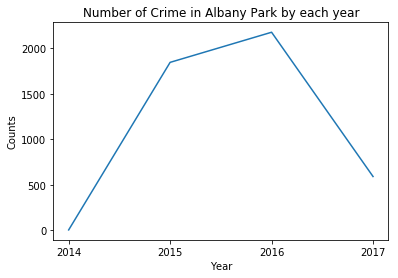

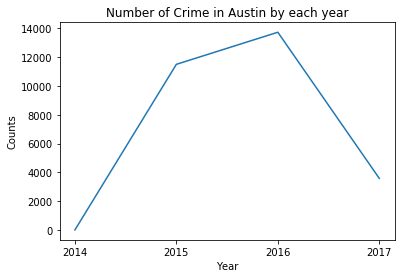

In [51]:
def plotCrimeNumbers(neighborhood):
    neighborhoodData = groupByNeighborhood.get_group(neighborhood)
    neighborhoodData['Date'] = pd.to_datetime(neighborhoodData['Date'])
    neighborhoodData['Year'] = pd.DatetimeIndex(neighborhoodData['Date']).year
    groupedByYear = neighborhoodData.groupby('Year')
    DataToPlot = pd.DataFrame(data = groupedByYear.size().reset_index(name='Counts'))
    #DataToPlot.columns = ['Year','Count']
    #print(DataToPlot['Count'])
    sns.lineplot(x="Year", y="Counts", data=DataToPlot)
    ax = plt.gca()
    ax.set_xticks(np.arange(DataToPlot['Year'][0], DataToPlot['Year'][DataToPlot['Year'].count()-1]+1 , 1))
    ax.set(title='Number of Crime in '+neighborhood+' by each year')
    plt.show()

plotCrimeNumbers('Albany Park')
plotCrimeNumbers('Austin')

### Prediction of House Prices
We have tried creating a regression from the house price data. We feed the price values of a region to find out the co-efficients of the regression line. We predicted the prices for future with the resulting model. Here goes the functions of this.

In [71]:
groupbydata=df1.groupby('Region')
selectedone = groupbydata.get_group('Chicago, IL - Albany Park')

In [72]:
x = np.arange(len(selectedone))
y = selectedone['Median Ppsf']

In [63]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x[:,np.newaxis], y[:,np.newaxis])

x_test = np.arange(90,100)

# Make predictions using the testing set
y_pred = regr.predict(x_test[:,np.newaxis])

In [64]:
print(y_pred)

[[205.28740421]
 [206.52542459]
 [207.76344497]
 [209.00146535]
 [210.23948573]
 [211.47750611]
 [212.71552649]
 [213.95354687]
 [215.19156725]
 [216.42958763]]


### Reflection

Finding correct data was hard. However the hardest part was to extract neighborhood data from the crime reports. We have tried multiple APIs to extract that information. Google Maps API was our first choice but it was too costly. Later we had to resort to **ArcGIS** to find the neighborhood. 
Initially, the data we were gathering had a lot of redundant data and we were looking for the ways to make sense of that data and which particular features should be selected in order to use it toward our analysis. 
It’s hard to show any concrete result right now. Because we are gathering more data of population based on chicago neighborhood.
Current biggest problem is to find population of chicago neighborhood from 2012 to 2018.
We are on right track. We need some data of population of chicago neighborhood, after that we can calculate crime rate. Finally we will find if there is any relationship of the changing crime rate and house price.
Given our initial exploration of the data, it is worth proceeding with project. 


### Next Step

-  To finish extracting the neighbourhoods in the crime dataset using ArcGIS
-  Quantifying crime rates 
-  Indexing neighbourhoods based on crime rate
-  Indexing neighbourhoods based on house prices
-  Find correlation between the change in crime rate in different neighbourhoods and the change in house prices in respective neighbourhoods over the years.
-  Make predictions of crime rate and house prices.
